# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

tv_df = pd.read_csv('/Users/jordy/OneDrive/Desktop/Women+/All_Streaming_Shows.csv')

tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12353 entries, 0 to 12352
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Series Title        12353 non-null  object 
 1   Year Released       12353 non-null  int64  
 2   Content Rating      7232 non-null   object 
 3   IMDB Rating         10207 non-null  float64
 4   R Rating            12353 non-null  int64  
 5   Genre               12353 non-null  object 
 6   Description         12353 non-null  object 
 7   No of Seasons       12353 non-null  object 
 8   Streaming Platform  10370 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 868.7+ KB


In [81]:
tv_df.dropna(inplace=True)

In [82]:
tv_df.describe()

,Year Released,IMDB Rating,R Rating
count,5920.000000,5920.000000,5920.000000
mean,2010.210980,7.068277,56.403209
std,11.073969,1.102745,13.806990
min,1934.000000,1.200000,18.000000
25%,2007.000000,6.500000,47.000000
50%,2014.000000,7.200000,56.000000
75%,2017.000000,7.800000,66.000000
max,2020.000000,9.700000,100.000000


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

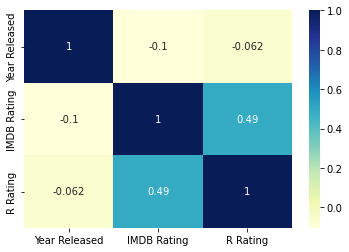

In [83]:
# The strongest correlations seems to be Rotten Tomatoes Rating and IMDB Rating 
sb.heatmap(tv_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

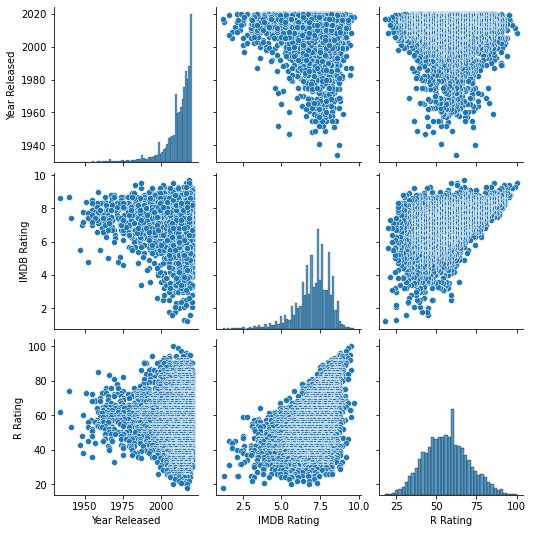

In [84]:
sb.pairplot(tv_df)

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [85]:
x = tv_df['R Rating']
y = tv_df['IMDB Rating']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train

479     77
958     71
183     83
5643    48
160     84
        ..
542     76
6964    43
4464    53
3781    55
392     79
Name: R Rating, Length: 4440, dtype: int64

In [87]:
y_train

479     8.0
958     7.7
183     8.2
5643    8.1
160     7.9
       ... 
542     8.3
6964    6.8
4464    6.1
3781    7.2
392     7.7
Name: IMDB Rating, Length: 4440, dtype: float64

In [88]:
x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IMDB Rating   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     1503.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          2.32e-283
Time:                        17:18:06   Log-Likelihood:                -6112.5
No. Observations:                4440   AIC:                         1.223e+04
Df Residuals:                    4438   BIC:                         1.224e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7796      0.061     78.774      0.000       4.661       4.899
R Rating       0.0404      0.001     38.763      0.000       0.038       0.042
==============================================================================
Omnibus:                      634.108   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1307.116
Skew:                          -0.868   Prob(JB):                    1.46e-284
Kurtosis:                       5.014   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

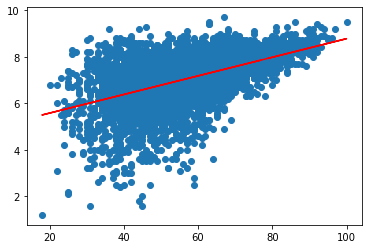

In [90]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 4.779 + 0.04*x_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [93]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

<Figure size 432x288 with 0 Axes>

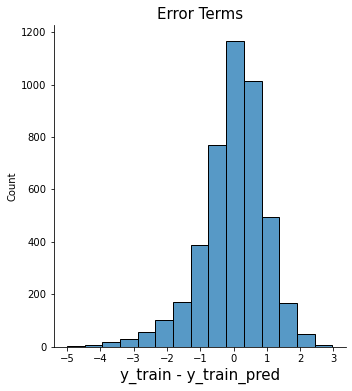

In [96]:
fig = plt.figure()
sb.displot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.253
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? Yes, to see if the ratings for the TV shows are correlated but not particularly 
3. Was your plot of the error terms a bell curve? Yes 